# Introdução ao Keras

Iremos trabalhar com base de dados imdb de filmes que o Keras possui nativamente. Essa base já foi trabalhada e é ideal para iniciarmos estudos com um cenário de dados já tratados.

Faremos uma análise de sentimentos pelos comentários feitos com relação aos filmes se é positivo ou negativo.

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data.shape

(25000,)

num_words: esse parâmetro irá considerar apenas as 10000 palavras mais frequentes dos comentários  existentes. Sem essa restrição existem 88000 palavras. 

Porém, o número de amostras está em torno de 30000, então, se usarmos todas só de passarmos uma regressão linear o modelo irá aprender 100% no treino porque irá decorar as saídas. 

Restringindo a 10000 evitaremos esse problema e treinaremos um modelo mais adequado.


In [4]:
def decode_words(word_index, sentence):
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #convertendo os pares (indice,palavra) para (palavra,indice)
    return ' '.join([reverse_word_index.get(i-3, "?") for i in sentence]) #i-3 porque o indice começa a partir dele

decode_words(imdb.get_word_index(), train_data[0])

1654784/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [10]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#separando as bases de treino de validação
X_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, 
                    validation_data=(X_val, y_val))

result = model.evaluate(X_test, y_test)
print(result)

Epoch 1/20
30/30 [==============================] - 6s 122ms/step - loss: 0.4990 - accuracy: 0.7828 - val_loss: 0.3627 - val_accuracy: 0.8736
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2886 - accuracy: 0.9041 - val_loss: 0.3070 - val_accuracy: 0.8805
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2145 - accuracy: 0.9275 - val_loss: 0.3013 - val_accuracy: 0.8760
Epoch 4/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1696 - accuracy: 0.9448 - val_loss: 0.2909 - val_accuracy: 0.8812
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1388 - accuracy: 0.9535 - val_loss: 0.2827 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1134 - accuracy: 0.9645 - val_loss: 0.2982 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 2s 52ms/step - loss: 0.0938 - accuracy: 0.9717 - val_loss: 0.3193 - val_accuracy: 0.8832
Epoch 8/20
3

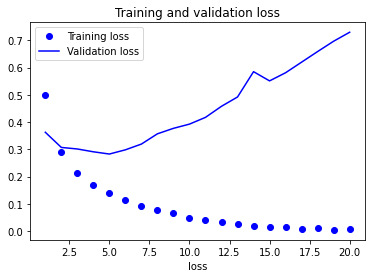

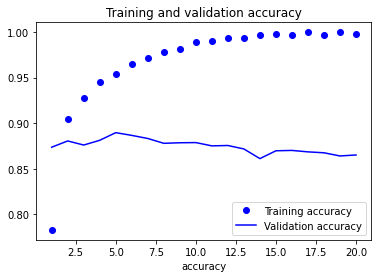

In [13]:
import matplotlib.pyplot as plt

def PrintHistory(history, function="loss"): #loss ou accuracy
    history_dict = history.history
    loss_values = history_dict[function]
    val_loss_values = history_dict["val_"+function]
    epochs = range(1, len(loss_values)+1)
    plt.plot(epochs, loss_values, "bo", label="Training "+function) #bo=blue o
    plt.plot(epochs, val_loss_values, "b", label="Validation "+function)
    plt.title("Training and validation "+function)
    plt.xlabel("Epochs")
    plt.xlabel(function)
    plt.legend()
    plt.show()

PrintHistory(history=history, function="loss")
PrintHistory(history=history, function="accuracy")

Epoch 1/4
30/30 [==============================] - 3s 93ms/step - loss: 0.5195 - accuracy: 0.7682 - val_loss: 0.3833 - val_accuracy: 0.8636
Epoch 2/4
30/30 [==============================] - 2s 53ms/step - loss: 0.3005 - accuracy: 0.9060 - val_loss: 0.3389 - val_accuracy: 0.8642
Epoch 3/4
30/30 [==============================] - 2s 53ms/step - loss: 0.2241 - accuracy: 0.9272 - val_loss: 0.2777 - val_accuracy: 0.8918
Epoch 4/4
782/782 [==============================] - 5s 7ms/step - loss: 0.3006 - accuracy: 0.8781
[0.3005668818950653, 0.8780800104141235]


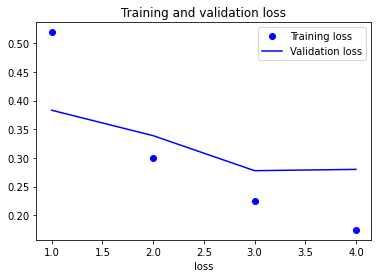

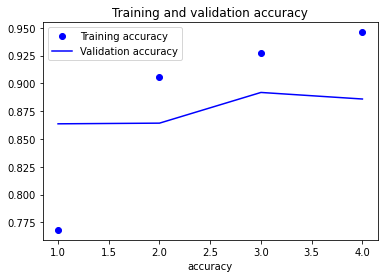

In [14]:
#treinando com 4 epochs

from tensorflow import keras
from keras import layers

model = keras.Sequential([layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#separando as bases de treino de validação
X_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=4, batch_size=512, 
                    validation_data=(X_val, y_val))

result = model.evaluate(X_test, y_test)
print(result)

PrintHistory(history=history, function="loss")
PrintHistory(history=history, function="accuracy")